# Persiapan

Import Library

---



In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Import Data dalam Format CSV

In [21]:
# Membaca data CSV
data = pd.read_csv('Emisi.csv')
# Melihat 5 data pertama
print(data.head())

   Ville (L/100 km)  Route (L/100 km)  kombinasi (L/100 km)  Emisi CO2 (g/km)
0               8.1               6.5                   7.4               172
1               8.9               6.5                   7.8               181
2              11.1               8.3                   9.9               230
3              12.6               9.4                  11.2               263
4              13.8              11.2                  12.4               291


 Membaca file CSV "Emisi.csv" menggunakan pandas dan menampilkan 5 baris pertama. Dataset ini berisi informasi tentang konsumsi bahan bakar dalam tiga kondisi (Ville, Route, dan Kombinasi) serta Emisi CO2 (g/km). Output menunjukkan nilai konsumsi bahan bakar dalam liter per 100 km dan emisi karbon dioksida dalam gram per km.

In [22]:
data.rename(columns={'Ville (L/100 km)': 'X', 'Emisi CO2 (g/km)': 'Y' }, inplace=True)
print(data)

        X  Route (L/100 km)  kombinasi (L/100 km)    Y
0     8.1               6.5                   7.4  172
1     8.9               6.5                   7.8  181
2    11.1               8.3                   9.9  230
3    12.6               9.4                  11.2  263
4    13.8              11.2                  12.4  291
..    ...               ...                   ...  ...
637   9.7               7.5                   8.7  205
638  10.7               8.1                   9.5  223
639  10.1               7.8                   9.1  213
640  10.0               7.8                   9.0  212
641  11.5               9.0                  10.4  244

[642 rows x 4 columns]


Sederhananya mendeklarasikan "Ville (L/100 km)" menjadi variabel "X" dan "Emisi CO2 (g/km)" menjadi variabel "Y" menggunakan data.rename(). Perubahan ini dilakukan langsung pada dataset dengan inplace=True, sehingga tidak perlu membuat variabel baru. Hasilnya, dataset sekarang memiliki kolom yang lebih ringkas, yang bisa mempermudah analisis lebih lanjut.

# Analisis

Menghitung Matriks Korelasi

In [23]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()
print(correlation_matrix)

                             X  Route (L/100 km)  kombinasi (L/100 km)  \
X                     1.000000          0.909671              0.986990   
Route (L/100 km)      0.909671          1.000000              0.961539   
kombinasi (L/100 km)  0.986990          0.961539              1.000000   
Y                     0.975617          0.951061              0.988786   

                             Y  
X                     0.975617  
Route (L/100 km)      0.951061  
kombinasi (L/100 km)  0.988786  
Y                     1.000000  


Matriks Korelasi dari dataset ini menggunakan data.corr(), yang menunjukkan hubungan linear antar variabel. Nilai korelasi berkisar antara -1 hingga 1, di mana nilai mendekati 1 menunjukkan korelasi positif yang kuat, sedangkan mendekati -1 menunjukkan korelasi negatif yang kuat. Dari output, terlihat bahwa X (konsumsi di kota), Route (di jalan raya), dan Kombinasi memiliki korelasi tinggi dengan Y (Emisi CO2)

Membuat Matriks Korelasi

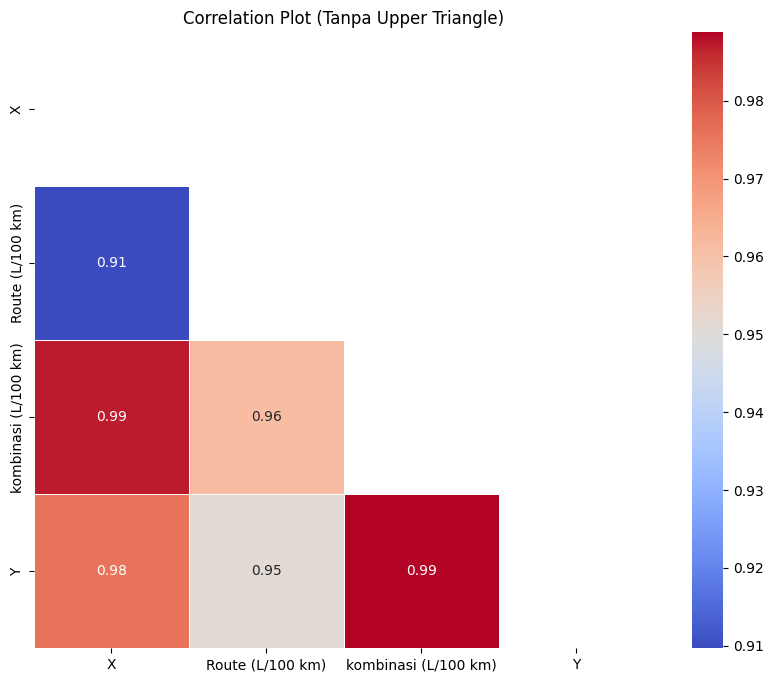

In [24]:
# Membuat mask untuk upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap tanpa upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot (Tanpa Upper Triangle)')
plt.show()

Dapat kita lihat bahwa kode tersebut menampilkan heatmap untuk memvisualisasikan korelasi antar variabel dalam dataset, tetapi hanya menampilkan lower triangle dengan menggunakan mask.

Membuat Model Regresi Sederhana

<Axes: xlabel='X', ylabel='Y'>

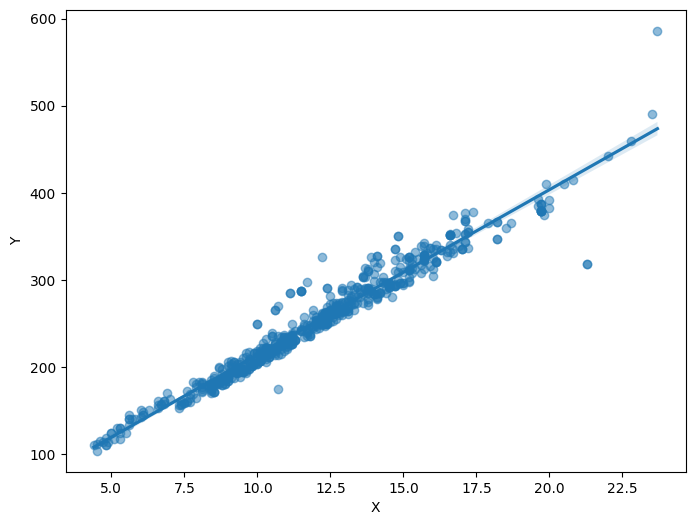

In [25]:
# Plot scatterplot dengan regresi
plt.figure(figsize=(8, 6))
sns.regplot(x="X", y="Y", data=data, scatter_kws={"alpha": 0.5})

x="X" dan y="Y" berarti plot menampilkan hubungan antara konsumsi bahan bakar di kota (X) dan emisi CO2 (Y). Garis regresi secara otomatis ditambahkan untuk menunjukkan tren hubungan linear antara kedua variabel. Sehingga dari plot ini, dapat kita lihat bahwa x dan y sangat berkorelasi positif. Di mana semakin tinggi konsumsi bahan bakar, semakin tinggi emisi CO2.

Membuat Model Regresi Sederhana #2

In [26]:
from sklearn.linear_model import LinearRegression

# Pisahkan variabel independen (X) dan dependen (Y)
X = data[["X"]]  # Perlu diubah ke bentuk 2D
Y = data["Y"]


# Menambahkan konstanta ke model (intercept)
X = sm.add_constant(X)

In [27]:
# Membuat model regresi linear
model = sm.OLS(Y, X).fit()

# Melihat ringkasan model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        05:36:46   Log-Likelihood:                -2618.3
No. Observations:                 642   AIC:                             5241.
Df Residuals:                     640   BIC:                             5250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7691      2.096     11.815      0.000      20.652      28.886
X             18.9382      0.168    112.454      0.000      18.608      19.269
==============================================================================
Omnibus:                      176.815   Durbin-Watson:                   1.308
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8794.363
Skew:                           0.308   Prob(JB):                         0.00
Kurtosis:                      21.121   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Output dari kode tersebut menunjukkan regresi linear sederhana dengan OLS (Ordinary Least Squares) dari statsmodels untuk memodelkan hubungan antara konsumsi bahan bakar di kota (X) dan emisi CO2 (Y). Intinya konsumsi bahan bakar di kota (X) sangat berkorelasi positif dengan emisi CO2 (Y), sehingga model ini cukup baik untuk prediksi.

In [28]:
print(model)
prediksi = model.predict(X)
prediksi

,0
0,178.168794
1,193.319386
2,234.983513
3,263.390873
4,286.116761
...,...
637,208.469978
638,227.408218
639,216.045274
640,214.151450


Baris pertama (178.168794) berarti ketika konsumsi bahan bakar X = 8.1, model memperkirakan emisi CO2 sekitar 178.17 (hasil yang dibulatkan) g/km. Prediksi meningkat seiring bertambahnya konsumsi bahan bakar, sesuai dengan hubungan positif antara X dan Y. Hasil ini menunjukkan bahwa model dapat digunakan untuk memperkirakan emisi kendaraan berdasarkan konsumsi bahan bakarnya.

Visualisasi Hasil Prediksi

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

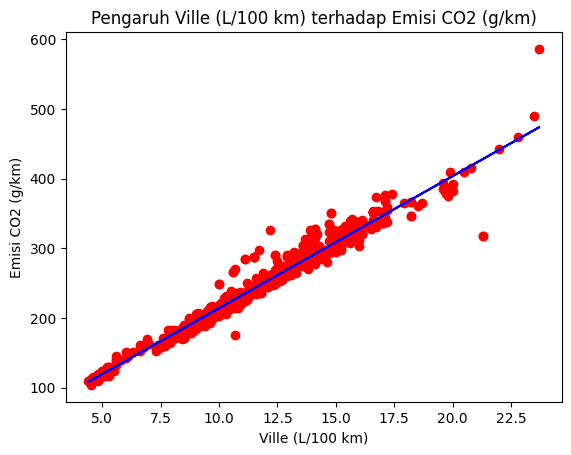

In [30]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg.predict(X), color = 'blue')
plt.title('Pengaruh Ville (L/100 km) terhadap Emisi CO2 (g/km)')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.show()

Kode ini membuat visualisasi regresi linear antara konsumsi bahan bakar di kota (X) dan emisi CO2 (Y). Dimana titik merah merupakan data asli dari dataset (scatter plot). Sedangkan garis biru adalah model regresi linear yang menunjukkan hubungan antara X dan Y. Sehingga garis biru yang mengikuti pola titik merah menegaskan bahwa konsumsi bahan bakar lebih tinggi cenderung meningkatkan emisi CO2, sesuai dengan hasil regresi sebelumnya.

# Evaluasi

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluasi model
mse = mean_squared_error(Y, prediksi)
mae = mean_absolute_error(Y, prediksi)
r2 = r2_score(Y, prediksi)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 204.1479
Mean Absolute Error (MAE): 9.0293
R-squared (R²): 0.9518


Setelah melakukan evaluasi terhadap model regresi linear menggunakan metrik MSE, MAE, dan R², dapat diketahui bahwa selisih antara nilai prediksi dan aktual rata-rata sekitar 9 satuan CO₂ g/km (MAE). Meskipun masih ada error namun nilainya relatif kecil dibandingkan skala data. Sedangkan R² mencapai tingkat akurasi yang lumayan baik yaitu di angka 95%.

# Membuat Model-Model Regresi Polynomial

In [32]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression()

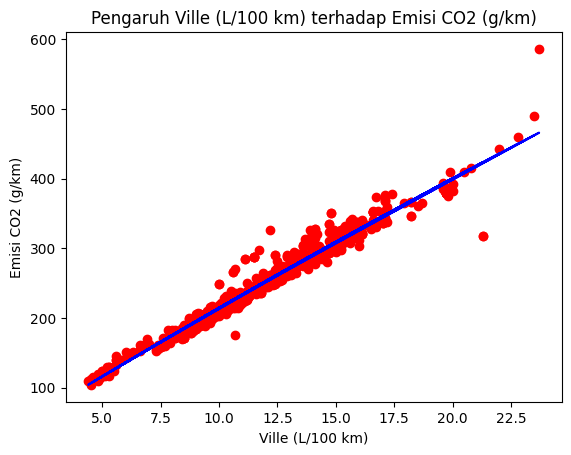

In [33]:
plt.scatter(X.X, Y, color = 'red')
plt.plot(X.X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Pengaruh Ville (L/100 km) terhadap Emisi CO2 (g/km)')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.show()

Kode ini memvisualisasikan regresi polinomial untuk melihat hubungan antara konsumsi bahan bakar di kota (X) dan emisi CO2 (Y). Dimana titik merah adalah data asli dari dataset (scatter plot). Sedangkan garis biru adalah hasil regresi polinomial yang lebih fleksibel dibandingkan regresi linear.

In [34]:
Y_poly = lin_reg_2.predict(X_poly)
Y_poly

array([177.55649707, 193.16562068, 235.63198483, 264.20057737,
       286.83025876, 233.71629137, 239.45920152, 239.45920152,
       258.51188027, 214.48290248, 224.1169729 , 229.88073422,
       239.45920152, 325.95053915, 322.25120965, 314.8358697 ,
       206.75062473, 216.41249672, 220.26751497, 216.41249672,
       224.1169729 , 216.41249672, 214.48290248, 231.79920784,
       231.79920784, 231.79920784, 264.20057737, 227.96087052,
       247.09695396, 216.41249672, 226.03961675, 226.03961675,
       252.81067247, 271.76604575, 249.00291687, 269.87676378,
       277.42555122, 346.19746086, 346.19746086, 346.19746086,
       329.64430835, 222.19293897, 233.71629137, 233.71629137,
       258.51188027, 249.00291687, 260.40950272, 260.40950272,
       327.79811879, 264.20057737, 264.20057737, 327.79811879,
       329.64430835, 348.02974964, 348.02974964, 204.8140801 ,
       193.16562068, 206.75062473, 189.27168024, 189.27168024,
       277.42555122, 312.97855952, 298.07003524, 303.67

Hasil output ini menunjukkan array prediksi nilai Y berdasarkan model regresi polinomial yang telah dibuat. Y_poly adalah array yang berisi nilai-nilai prediksi dari variabel dependen (Emisi CO2) berdasarkan model regresi polinomial. Nilai-nilai dalam array adalah estimasi emisi CO2 berdasarkan input X setelah diproses melalui transformasi polinomial dan diprediksi oleh model.


In [35]:
# Evaluasi model
mse_poly = mean_squared_error(Y, Y_poly)
mae_poly = mean_absolute_error(Y, Y_poly)
r2_poly = r2_score(Y, Y_poly)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE Poly): {mse_poly:.4f}")
print(f"Mean Absolute Error (MAE Poly): {mae_poly:.4f}")
print(f"R-squared (R² Poly): {r2_poly:.4f}")

Mean Squared Error (MSE Poly): 202.7943
Mean Absolute Error (MAE Poly): 9.0976
R-squared (R² Poly): 0.9521


Setelah melakukan evaluasi terhadap model regresi polinomial menggunakan metrik MSE, MAE, dan R², dapat diketahui bahwa selisih antara nilai prediksi dan aktual rata-rata sekitar 9 satuan CO₂ g/km (MAE). Meskipun masih ada error namun nilainya relatif kecil dibandingkan skala data. Sedangkan R² mencapai tingkat akurasi yang lumayan baik yaitu di angka 95%.